### blur(convolve2d)

In [4]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [9]:
img = mpimg.imread('lena.png')

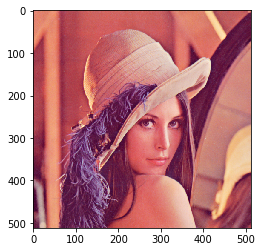

In [11]:
plt.imshow(img)

In [16]:
bw = img.mean(axis=2)

In [23]:
W = np.zeros((20,20))

In [25]:
for i in range(20):
    for j in range(20):
        distance = (i-10)**2+(j-10)**2
        W[i,j] = np.exp(-(distance/50))

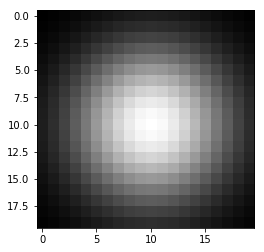

In [26]:
plt.imshow(W,cmap='gray')

In [27]:
out = convolve2d(bw, W)

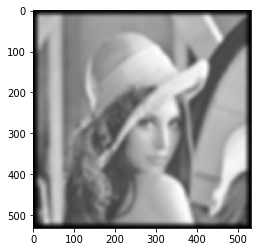

In [28]:
plt.imshow(out,cmap='gray')

In [33]:
out.shape

(531, 531)

In [34]:
img.shape

(512, 512, 3)

In [35]:
out1 = convolve2d(bw,W,mode='same')

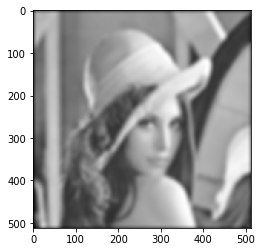

In [36]:
plt.imshow(out1,'gray')

### edge detection

In [37]:
HX = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float32)

In [38]:
HY = HX.T

In [39]:
GX = convolve2d(bw,HX)

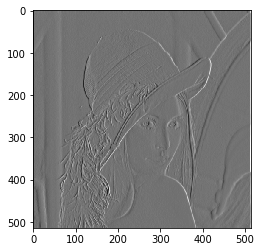

In [40]:
plt.imshow(GX,'gray')

In [41]:
GY = convolve2d(bw,HY)

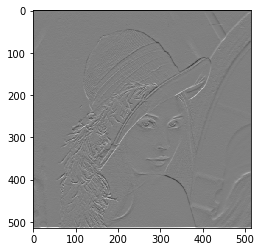

In [42]:
plt.imshow(GY,'gray')

In [43]:
res = GX**2 + GY**2

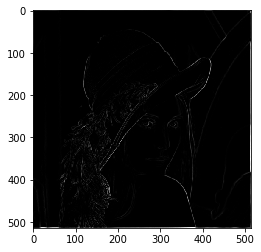

In [44]:
plt.imshow(res,'gray')

## my_convolution

In [45]:
def my_con(X,W):
    n1,n2 = X.shape
    m1,m2 = W.shape
    Y = np.zeros((n1+m1-1,n2+m2-1))
    for i in range(n1+m1-1):
        for j in range(n2+m2-1):
            for ii in range(m1):
                for jj in range(m2):
                    if i>=ii and j>=jj and i-ii< n1 and j-jj<n2:
                        Y[i,j] += W[ii,jj]*X[i-ii,j-jj]
    return Y

In [47]:
out = my_con(bw,W)

In [53]:
### optimize
def my_con1(X,W):
    n1,n2 = X.shape
    m1,m2 = W.shape
    Y = np.zeros((n1+m1-1,n2+m2-1))
    for i in range(n1):
        for j in range(n2):
            Y[i:i+m1,j:j+m2] += X[i,j]*W
    return Y

In [54]:
out = my_con1(bw,W)

In [60]:
#get same size as input
def my_con2(X,W):
    n1,n2 = X.shape
    m1,m2 = W.shape
    Y = np.zeros((n1+m1-1,n2+m2-1))
    for i in range(n1):
        for j in range(n2):
            Y[i:i+m1,j:j+m2] += X[i,j]*W
            ret = Y[m1//2:-m1//2+1,m2//2:-m2//2+1]
    return ret

In [61]:
out = my_con2(bw,W)

In [63]:
#get smaller
def my_con3(X,W):
    n1,n2 = X.shape
    m1,m2 = W.shape
    Y = np.zeros((n1+m1-1,n2+m2-1))
    for i in range(n1):
        for j in range(n2):
            Y[i:i+m1,j:j+m2] += X[i,j]*W
            ret = Y[m1:-m1+1,m2:-m2+1]
    return ret

In [64]:
out = my_con3(bw,W)